# References
This notebook is heavily based on the excellent ``Practical RL'' course from the Yandex
School of Data Analysis
https://github.com/yandexdataschool/Practical_RL/

# Crossentropy method

This notebook will teach you to solve reinforcement learning with crossentropy method.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
import gym
import numpy as np, pandas as pd

env = gym.make("Taxi-v2")
env.reset()
env.render()

[2017-07-21 10:26:21,650] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i"%(n_states,n_actions))

n_states=500, n_actions=6


# Create stochastic policy

This time our policy should be a probability distribution.

```policy[s,a] = P(take action a | in state s)```

Since we still use integer state and action representations, you can use a 2-dimensional array to represent the policy.

Please initialize policy __uniformly__, that is, probabililities of all actions should be equal.


In [4]:
policy = np.ones((n_states, n_actions)) / n_actions

In [5]:
assert type(policy) in (np.ndarray,np.matrix)
assert np.allclose(policy,1./n_actions)
assert np.allclose(np.sum(policy,axis=1), 1)

# Play the game

Just like before, but we also record all states and actions we took.

In [8]:
def generate_session(policy, t_max=10**4):
    """
    Play game until end or for t_max ticks.
    returns: list of states, list of actions and sum of rewards
    """
    states,actions = [],[]
    total_reward = 0.
    
    s = env.reset()
    
    for t in range(t_max):
        
        a = np.random.choice(n_actions, 1, p=policy[s, :])
        
        new_s,r,done,info = env.step(a[0])
        
        states.append(s)
        actions.append(a)
        total_reward += r
        
        s = new_s
        if done:
            break
    return states,actions,total_reward
        

In [10]:
s,a,r = generate_session(policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) is float

# Training loop
Generate sessions, select N best and fit to those.

In [13]:
def run(policy, n_samples=250, percentile=50, smoothing=.1):
    step_rewards = []
    step_thresholds = []

    for i in range(100):

        sessions = [generate_session(policy) for k in range(n_samples)]

        batch_states,batch_actions,batch_rewards = map(np.array,zip(*sessions))

        #batch_states: a list of lists of states in each session
        #batch_actions: a list of lists of actions in each session
        #batch_rewards: a list of floats - total rewards at each session

        threshold = np.percentile(batch_rewards, percentile)

        elite_states = [batch_states[j] for j, r in enumerate(batch_rewards) if r > threshold]
        elite_actions  = [batch_actions[j] for j, r in enumerate(batch_rewards) if r > threshold]

        elite_states, elite_actions = map(np.concatenate,[elite_states,elite_actions])
        #hint on task above: use np.percentile and numpy-style indexing

        #count actions from elite states
        elite_counts = np.zeros_like(policy)+smoothing

        for s, a in zip(elite_states, elite_actions):
            elite_counts[s, a] += 1

        policy = elite_counts / elite_counts.sum(axis=1).reshape(elite_counts.shape[0], 1)

        print("mean reward = %.5f\tthreshold = %.1f"%(np.mean(batch_rewards),threshold))
        step_rewards.append(np.mean(batch_rewards))
        step_thresholds.append(threshold)
    return step_rewards, step_thresholds        

In [14]:
step_rewards, step_threshold = run(percentile=50, policy=policy)

mean reward = -748.90000	threshold = -776.0
mean reward = -658.96800	threshold = -713.0
mean reward = -550.54000	threshold = -609.5
mean reward = -440.40000	threshold = -460.0
mean reward = -291.70400	threshold = -253.0
mean reward = -177.12400	threshold = -151.0
mean reward = -122.66000	threshold = -103.0
mean reward = -123.18400	threshold = -82.5
mean reward = -102.96400	threshold = -67.0
mean reward = -76.77200	threshold = -49.0
mean reward = -56.55600	threshold = -35.5
mean reward = -52.18000	threshold = -28.0
mean reward = -56.34400	threshold = -25.0
mean reward = -49.17600	threshold = -17.5
mean reward = -48.92400	threshold = -14.0
mean reward = -53.55600	threshold = -13.0
mean reward = -65.53200	threshold = -16.0
mean reward = -41.55600	threshold = -10.0
mean reward = -58.99200	threshold = -14.5
mean reward = -44.85600	threshold = -11.0
mean reward = -57.89600	threshold = -17.0
mean reward = -65.25200	threshold = -15.0
mean reward = -49.27200	threshold = -13.0
mean reward = -34.

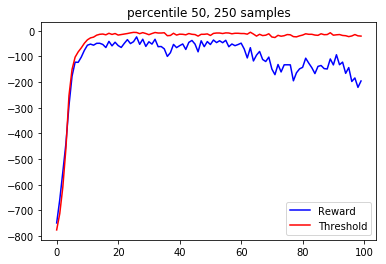

In [16]:
plt.cla()
plt.title("percentile 50, 250 samples")
plt.plot(range(100), step_rewards, label='Reward', color="blue")
plt.plot(range(100), step_threshold, label='Threshold', color="red")
plt.legend()
plt.show()

mean reward = -776.73600	threshold = -830.0
mean reward = -736.77600	threshold = -803.0
mean reward = -702.81600	threshold = -767.0
mean reward = -665.22000	threshold = -731.0
mean reward = -630.09200	threshold = -695.0
mean reward = -574.86000	threshold = -668.0
mean reward = -553.41200	threshold = -632.0
mean reward = -525.62400	threshold = -614.0
mean reward = -484.17600	threshold = -569.0
mean reward = -433.99200	threshold = -539.8
mean reward = -401.89200	threshold = -497.0
mean reward = -363.05200	threshold = -470.0
mean reward = -343.67600	threshold = -443.0
mean reward = -292.75200	threshold = -398.0
mean reward = -260.38000	threshold = -362.0
mean reward = -245.77600	threshold = -335.0
mean reward = -202.20800	threshold = -308.0
mean reward = -184.28000	threshold = -272.0
mean reward = -169.36800	threshold = -245.0
mean reward = -128.24000	threshold = -194.0
mean reward = -164.85200	threshold = -159.2
mean reward = -140.38800	threshold = -138.8
mean reward = -85.07600	threshol

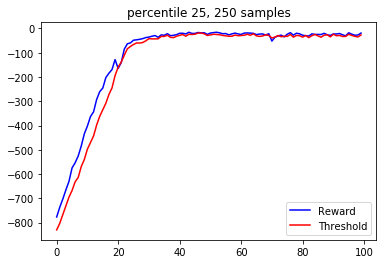

In [17]:
step_rewards, step_threshold = run(percentile=25, policy=policy)
plt.cla()
plt.title("percentile 25, 250 samples")
plt.plot(range(100), step_rewards, label='Reward', color="blue")
plt.plot(range(100), step_threshold, label='Threshold', color="red")
plt.legend()
plt.show()

mean reward = -792.57000	threshold = -841.2
mean reward = -771.99000	threshold = -812.0
mean reward = -737.87000	threshold = -812.0
mean reward = -710.15000	threshold = -785.0
mean reward = -660.84000	threshold = -740.0
mean reward = -575.75000	threshold = -695.0
mean reward = -527.63000	threshold = -623.0
mean reward = -535.13000	threshold = -632.0
mean reward = -512.77000	threshold = -587.0
mean reward = -494.94000	threshold = -589.2
mean reward = -486.33000	threshold = -571.2
mean reward = -486.10000	threshold = -535.2
mean reward = -444.22000	threshold = -506.0
mean reward = -373.74000	threshold = -461.2
mean reward = -380.68000	threshold = -454.2
mean reward = -374.88000	threshold = -427.2
mean reward = -360.46000	threshold = -418.2
mean reward = -341.11000	threshold = -398.0
mean reward = -342.03000	threshold = -407.0
mean reward = -336.11000	threshold = -399.5
mean reward = -314.08000	threshold = -380.0
mean reward = -343.51000	threshold = -380.0
mean reward = -340.60000	thresho

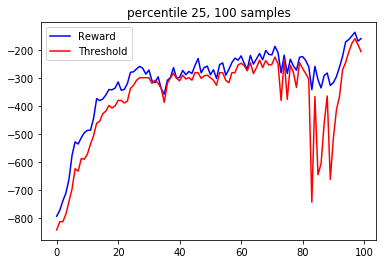

In [18]:
step_rewards, step_threshold = run(percentile=25, n_samples=100, policy=policy)
plt.cla()
plt.title("percentile 25, 100 samples")
plt.plot(range(100), step_rewards, label='Reward', color="blue")
plt.plot(range(100), step_threshold, label='Threshold', color="red")
plt.legend()
plt.show()

# Homework

### Tabular correntropy method

You may have noticed that the taxi problem quickly converges from -10k to aroung -500 score (+- 500) and stays there. This is in part because taxi-v2 has some hard-coded randomness in the environment. Other reason is that the percentile was chosen poorly.

### Tasks
- __1.1__ (5 pt) Modify the tabular CEM (CrossEntropyMethod) code to plot distribution of rewards and threshold on each tick.
- __1.2__ (5 pts) Find out how the algorithm performance changes if you change different percentile and different n_samples.

As expected, a smaller (but not too small) percentile converges slower but better better and fewer n_samples work worse.

- __1.3__ (10 pts) Tune the algorithm to end up with positive average score.
- __1.4 bonus__ (10 pt) Try to achieve a distribution where 25% or more samples score above +9.0

It's okay to modify the existing code.
